In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from IPython.display import Javascript
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
from pydub.playback import play
from google.colab import output

In [2]:
class AudioSignal:
  @staticmethod
  def __record(file_name, sec=3):
    RECORD = """
    const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
    const b2text = blob => new Promise(resolve => {
      const reader = new FileReader()
      reader.onloadend = e => resolve(e.srcElement.result)
      reader.readAsDataURL(blob)
    })
    var record = time => new Promise(async resolve => {
      stream = await navigator.mediaDevices.getUserMedia({ audio: true })
      recorder = new MediaRecorder(stream)
      chunks = []
      recorder.ondataavailable = e => chunks.push(e.data)
      recorder.start()
      await sleep(time)
      recorder.onstop = async ()=>{
        blob = new Blob(chunks)
        text = await b2text(blob)
        resolve(text)
      }
      recorder.stop()
    })
    """
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    audio = AudioSegment.from_file(BytesIO(b))
    audio.export(file_name, format='wav', parameters=["-ar", "8000"])
    return audio

  def __init__(self, file_name):
    self.sample_rate = 8000
    self.file_name = file_name

  def record(self, sec):
    self.audioSegment = self.__record(self.file_name, sec)
    return self.audioSegment

  def read(self):
    self.y, self.sample_rate = sf.read(self.file_name)
    return self.y

In [4]:
audioSignal1 = AudioSignal('audio_1.wav')
audioSignal1.record(3)

<IPython.core.display.Javascript object>

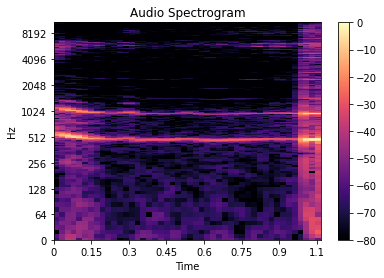

In [5]:
spec = np.abs(librosa.stft(audioSignal1.read()))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');